In [3]:
"""
QUESTION 1
"""
print("----------- QUESTION 1 -----------")
# -*- coding: utf-8 -*-
import numpy as np
import random
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
import itertools
np.random.seed(42)
random.seed(42)

# load data
categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 
              'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
dataset = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)

# define stop_words and vectorizer
stop_words = text.ENGLISH_STOP_WORDS
vectorizer = text.CountVectorizer(min_df=3, stop_words=stop_words)

# get the TF matrix
X_counts = vectorizer.fit_transform(dataset.data)
X_counts.toarray()

# TF-IDF matrix
X_tfidf = text.TfidfTransformer().fit_transform(X_counts)
print ("The dimension of the TF-IDF matrix is ", X_tfidf.shape)

----------- QUESTION 1 -----------
The dimension of the TF-IDF matrix is  (7882, 27768)


----------- QUESTION 2 -----------
the contingency table is 
 [[   4 3899]
 [1718 2261]]
contingency table


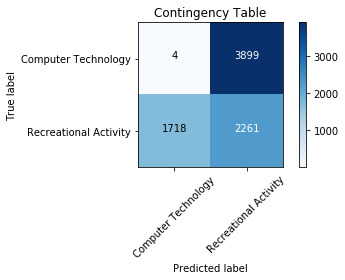

In [4]:
"""
QUESTION 2
"""
print("----------- QUESTION 2 -----------")

# Plot the contingency table
def plot_contingency_table(cm, classes, normalize=False, cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized contingency table")
    else:
        print('contingency table')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title("Contingency Table")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# assign labels to data
num_data = len(dataset.target)
y = [0 if dataset.target[i] < 4 else 1 for i in range(num_data)]

# train a KMeans classifier
kmeans_clf = KMeans(n_clusters=2, n_init=50, max_iter=1500, random_state=0)

# use k-means to predict the label for each data
y_pred = kmeans_clf.fit_predict(X_tfidf)

# report contingency table
print("the contingency table is \n", metrics.cluster.contingency_matrix(y,y_pred))

# plot the contingency table
classes = ["Computer Technology","Recreational Activity"]
plt.figure()
plot_contingency_table(metrics.cluster.contingency_matrix(y,y_pred), classes, normalize=False)
plt.show()

In [5]:
"""
QUESTION 3
"""
print("----------- QUESTION 3 -----------")

# evaluate clustering scores
print("Homogeneity: ",metrics.homogeneity_score(y,y_pred))
print("Completeness: ",metrics.completeness_score(y,y_pred))
print("V-measure: ",metrics.v_measure_score(y,y_pred))
print("adjusted Rand Index: ",metrics.adjusted_rand_score(y,y_pred))
print("adjusted mutual information score: ",metrics.adjusted_mutual_info_score(y,y_pred))

----------- QUESTION 3 -----------
Homogeneity:  0.2535958928926043
Completeness:  0.334815748824373
V-measure:  0.28860033608397917
adjusted Rand Index:  0.18076179588914554
adjusted mutual information score:  0.25352755133060884


C:\Users\andyx\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


----------- QUESTION 4 -----------


2019-01-29 20:13:30,560 WARNING No handles with labels found to put in legend.


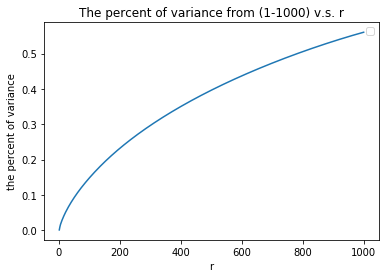

In [50]:
"""
QUESTION 4
"""
print("----------- QUESTION 4 -----------")

svd = TruncatedSVD(n_components = 1000, random_state = 42)
X_SVD_1000 = svd.fit_transform(X_tfidf)
var = svd.explained_variance_ratio_

r = range(1,1001)
top_r_var = []

for i in r :
    top_r_var.append(var[0:i].sum())
    
# Plot adjusted mutual info
plt.plot(r, top_r_var)
plt.xlabel('r')
plt.ylabel('the percent of variance')
plt.title('The percent of variance from (1-1000) v.s. r')
plt.legend() 
plt.show() 


----------- QUESTION 5 -----------


C:\Users\andyx\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\andyx\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\andyx\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\andyx\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use a

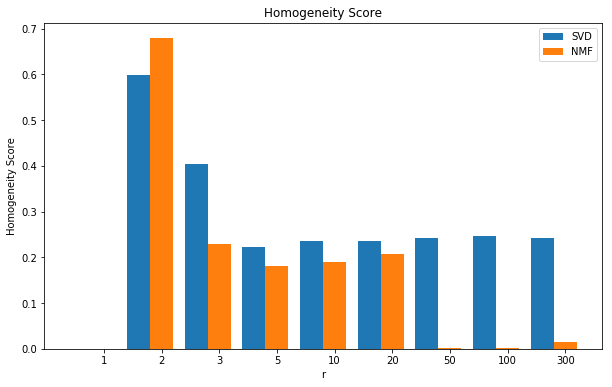

The best r for homogeneity score of SVD is 2
The best r for homogeneity score of NMF is 2


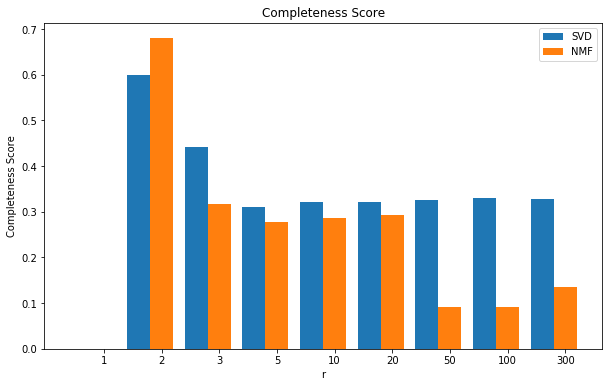

The best r for completeness score of SVD is 2
The best r for completeness score of NMF is 2


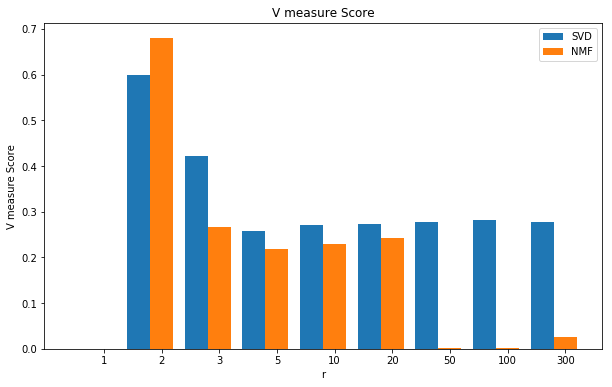

The best r for V measure score of SVD is 2
The best r for V measure score of NMF is 2


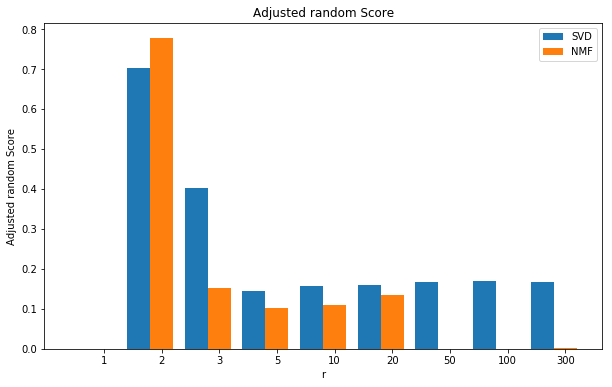

The best r for adjusted random score of SVD is 2
The best r for adjusted random score of NMF is 2


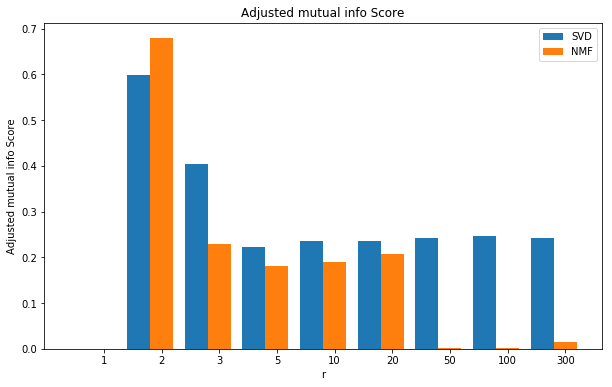

The best r for adjusted mutual info score of SVD is 2
The best r for adjusted mutual info score of NMF is 2


In [6]:
"""
QUESTION 5
"""
print("----------- QUESTION 5 -----------")

r = [1, 2, 3, 5, 10, 20, 50, 100, 300]

homogeneity_SVD = []
homogeneity_NMF = []
completeness_SVD = []
completeness_NMF = []
vmeasure_SVD = []
vmeasure_NMF = []
adjusted_rand_SVD = []
adjusted_rand_NMF = []
adjusted_mutual_SVD = []
adjusted_mutual_NMF = []

for i in r :
    svd =  TruncatedSVD(n_components=i, random_state=42)
    X_SVD = svd.fit_transform(X_tfidf)
    y_pred_SVD = KMeans(n_clusters=2, n_init=50, max_iter=1500, random_state=0).fit_predict(X_SVD)
    nmf = NMF(n_components=i, random_state=42)
    X_NMF = nmf.fit_transform(X_tfidf)
    y_pred_NMF = KMeans(n_clusters=2, n_init=50, max_iter=1500, random_state=0).fit_predict(X_NMF)
    homogeneity_SVD.append(metrics.homogeneity_score(y,y_pred_SVD))
    homogeneity_NMF.append(metrics.homogeneity_score(y,y_pred_NMF))
    completeness_SVD.append(metrics.completeness_score(y,y_pred_SVD))
    completeness_NMF.append(metrics.completeness_score(y,y_pred_NMF))
    vmeasure_SVD.append(metrics.v_measure_score(y,y_pred_SVD))
    vmeasure_NMF.append(metrics.v_measure_score(y,y_pred_NMF))
    adjusted_rand_SVD.append(metrics.adjusted_rand_score(y,y_pred_SVD))
    adjusted_rand_NMF.append(metrics.adjusted_rand_score(y,y_pred_NMF))
    adjusted_mutual_SVD.append(metrics.adjusted_mutual_info_score(y,y_pred_SVD))
    adjusted_mutual_NMF.append(metrics.adjusted_mutual_info_score(y,y_pred_NMF))
 

# Just for ploting 
x1 = [1, 2, 3, 4, 5, 6, 7, 8 ,9]
x2 = [1.4, 2.4, 3.4, 4.4, 5.4, 6.4, 7.4, 8.4, 9.4]

# Plot homogeneity score
plt.figure(figsize=(10,6))
plt.bar(x1,homogeneity_SVD,width =0.4,label='SVD',tick_label = r)
plt.bar(x2,homogeneity_NMF,width =0.4,label='NMF',tick_label = r)
plt.xlabel('r')
plt.ylabel('Homogeneity Score')
plt.title('Homogeneity Score')
plt.legend() 
plt.show() 

print("The best r for homogeneity score of SVD is", homogeneity_SVD.index(max(homogeneity_SVD))+1)
print("The best r for homogeneity score of NMF is", homogeneity_NMF.index(max(homogeneity_NMF))+1)

# Plot completeness score
plt.figure(figsize=(10,6))
plt.bar(x1,completeness_SVD,width =0.4,label='SVD',tick_label = r)
plt.bar(x2,completeness_NMF,width =0.4,label='NMF',tick_label = r)
plt.xlabel('r')
plt.ylabel('Completeness Score')
plt.title('Completeness Score')
plt.legend() 
plt.show() 

print("The best r for completeness score of SVD is", completeness_SVD.index(max(completeness_SVD))+1)
print("The best r for completeness score of NMF is", completeness_NMF.index(max(completeness_NMF))+1)

# Plot V measure score
plt.figure(figsize=(10,6))
plt.bar(x1, vmeasure_SVD,width =0.4,label='SVD',tick_label = r)
plt.bar(x2, vmeasure_NMF,width =0.4,label='NMF',tick_label = r)
plt.xlabel('r')
plt.ylabel('V measure Score')
plt.title('V measure Score')
plt.legend() 
plt.show() 

print("The best r for V measure score of SVD is", vmeasure_SVD.index(max(vmeasure_SVD))+1)
print("The best r for V measure score of NMF is", vmeasure_NMF.index(max(vmeasure_NMF))+1)

# Plot adjusted random score score
plt.figure(figsize=(10,6))
plt.bar(x1,adjusted_rand_SVD,width =0.4,label='SVD',tick_label = r)
plt.bar(x2,adjusted_rand_NMF,width =0.4,label='NMF',tick_label = r)
plt.xlabel('r')
plt.ylabel('Adjusted random Score')
plt.title('Adjusted random Score')
plt.legend() 
plt.show() 

print("The best r for adjusted random score of SVD is", adjusted_rand_SVD.index(max(adjusted_rand_SVD))+1)
print("The best r for adjusted random score of NMF is", adjusted_rand_NMF.index(max(adjusted_rand_NMF))+1)

# Plot adjusted mutual info
plt.figure(figsize=(10,6))
plt.bar(x1,adjusted_mutual_SVD,width =0.4,label='SVD',tick_label = r)
plt.bar(x2,adjusted_mutual_NMF,width =0.4,label='NMF', tick_label = r)
plt.xlabel('r')
plt.ylabel('Adjusted mutual info Score')
plt.title('Adjusted mutual info Score')
plt.legend() 
plt.show() 

print("The best r for adjusted mutual info score of SVD is", adjusted_mutual_SVD.index(max(adjusted_mutual_SVD))+1)
print("The best r for adjusted mutual info score of NMF is", adjusted_mutual_NMF.index(max(adjusted_mutual_NMF))+1)

In [7]:
"""
QUESTION 6
"""
print("When r is small, as we saw in the variance graph, we only keep a small amount of information from the original data so we get a bad clustering.")
print("When r is big, we are in a high dimensional space and in this space, the Euclidean distance is not good for clustering anymore (K-means is based on the Euclidean distance)")

When r is small, as we saw in the variance graph, we only keep a small amount of information from the original data so we get a bad clustering.
When r is big, we are in a high dimensional space and in this space, the Euclidean distance is not good for clustering anymore (K-means is based on the Euclidean distance)


----------- QUESTION 7 -----------


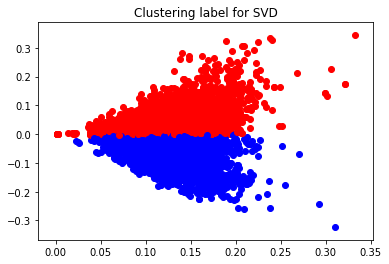

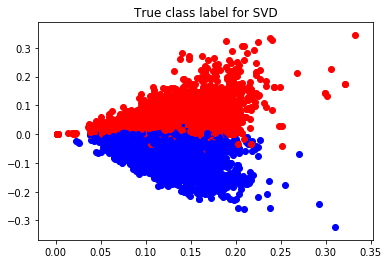

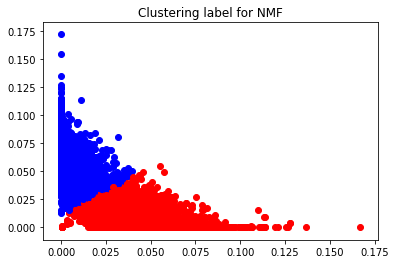

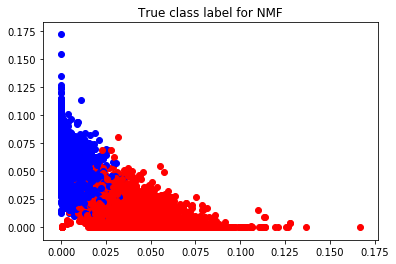

In [58]:
"""
QUESTION 7
"""
print("----------- QUESTION 7 -----------")

best_k_svd = 2
svd =  TruncatedSVD(n_components=best_k_svd, random_state=42)
X_svd = svd.fit_transform(X_tfidf)
y_pred_svd = KMeans(n_clusters=2, n_init=50, max_iter=1500, random_state=0).fit_predict(X_svd)

best_k_nmf = 2
nmf =  NMF(n_components=best_k_nmf, random_state=42)
X_nmf = nmf.fit_transform(X_tfidf)
y_pred_nmf = KMeans(n_clusters=2, n_init=50, max_iter=1500, random_state=0).fit_predict(X_nmf)

def plot_cluster_or_class(X,y):  # X is a n-by-k matrix,but when we project it to a 2-D plane we only use the first two columns.
    for i in range(X.shape[0]):
        if y[i]==0:
            plt.scatter(X[i,0],X[i,1],c='r')
        elif y[i]==1:
            plt.scatter(X[i,0],X[i,1],c='b')

#SVD
plot_cluster_or_class(X_svd,y_pred_svd)
plt.title('Clustering label for SVD')
plt.show()

plot_cluster_or_class(X_svd,y)
plt.title('True class label for SVD')
plt.show()

#NMF
plot_cluster_or_class(X_nmf,y_pred_nmf)
plt.title('Clustering label for NMF')
plt.show()

plot_cluster_or_class(X_nmf,y)
plt.title('True class label for NMF')
plt.show()

----------- QUESTION 8 -----------


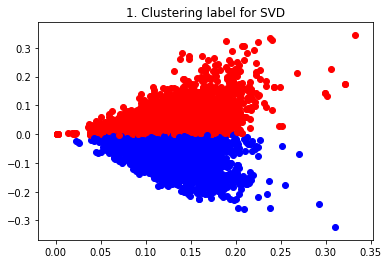

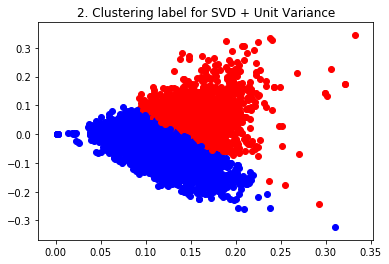

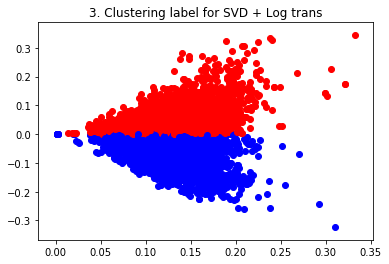

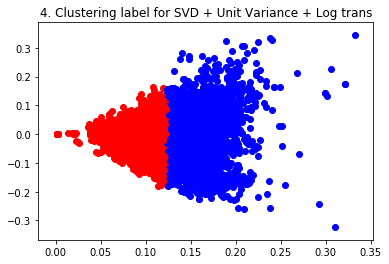

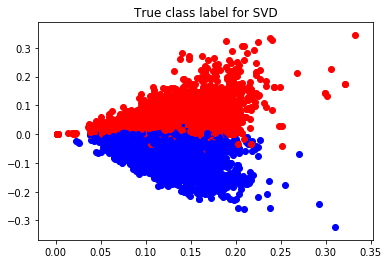

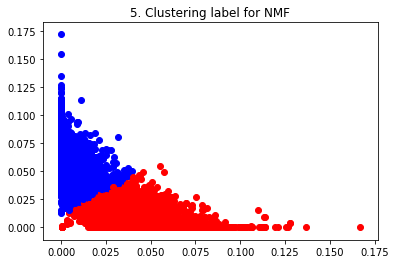

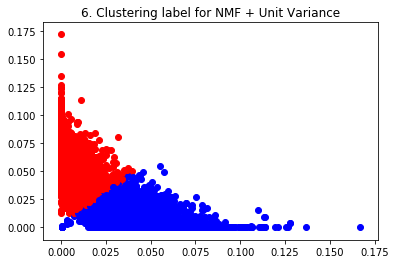

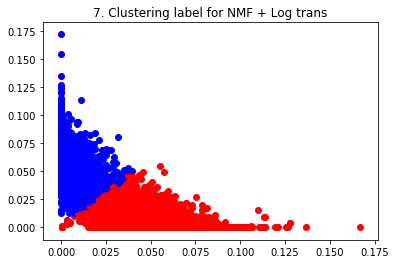

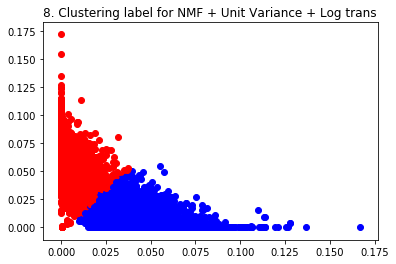

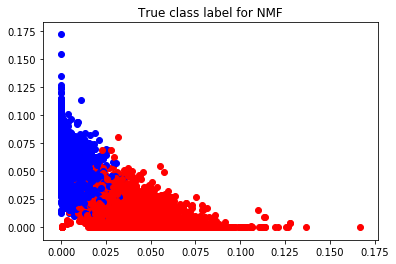

In [69]:
"""
QUESTION 8
"""
print("----------- QUESTION 8 -----------")

# Do the transformation
def log_trans(dataMatrix) :
    c = 0.01
    finalMatrix = np.zeros(shape=(dataMatrix.shape[0],dataMatrix.shape[1]))
    for i in range(0, finalMatrix.shape[0]) :
        for j in range(0, finalMatrix.shape[1]) : 
            finalMatrix[i,j] = np.log(abs(dataMatrix[i,j])+c)-np.log(c) if dataMatrix[i,j] > 0 \
                                else -np.log(abs(dataMatrix[i,j])+c)+np.log(c) if dataMatrix[i,j] < 0 else 0
    return finalMatrix
    
from sklearn import preprocessing

# For each feature, let them have unit variance and zero means
X_svd_scaled = preprocessing.scale(X_svd)
X_nmf_scaled = preprocessing.scale(X_nmf)

ynot = []
for i in range(0,len(y)) :
    if y[i] == 0 :
        ynot.append(1)
    else :
        ynot.append(0)

# Combination 1： SVD
y_pred_svd_1 = KMeans(n_clusters=2, n_init=50, max_iter=1500, random_state=0).fit_predict(X_svd)
plot_cluster_or_class(X_svd,y_pred_svd_1)
plt.title('1. Clustering label for SVD')
plt.show()
# Combination 2: SVD + Unit Variance
y_pred_svd_2 = KMeans(n_clusters=2, n_init=50, max_iter=1500, random_state=0).fit_predict(X_svd_scaled)
plot_cluster_or_class(X_svd,y_pred_svd_2)
plt.title('2. Clustering label for SVD + Unit Variance')
plt.show()
# Combination 3: SVD + Log Trans
y_pred_svd_3 = KMeans(n_clusters=2, n_init=50, max_iter=1500, random_state=0).fit_predict(log_trans(X_svd))
plot_cluster_or_class(X_svd,y_pred_svd_3)
plt.title('3. Clustering label for SVD + Log trans')
plt.show()
# Combination 4: SVD + Unit Variance + Log Trans
y_pred_svd_4 = KMeans(n_clusters=2, n_init=50, max_iter=1500, random_state=0).fit_predict(log_trans(X_svd_scaled))
plot_cluster_or_class(X_svd,y_pred_svd_4)
plt.title('4. Clustering label for SVD + Unit Variance + Log trans')
plt.show()
# True Class for SVD
plot_cluster_or_class(X_svd,y)
plt.title('True class label for SVD')
plt.show()
# Combination 5: NMF
y_pred_nmf_1 = KMeans(n_clusters=2, n_init=50, max_iter=1500, random_state=0).fit_predict(X_nmf)
plot_cluster_or_class(X_nmf,y_pred_nmf_1)
plt.title('5. Clustering label for NMF')
plt.show()
# Combination 6:  NMF + Unit Variance
y_pred_nmf_2 = KMeans(n_clusters=2, n_init=50, max_iter=1500, random_state=0).fit_predict(X_nmf_scaled)
plot_cluster_or_class(X_nmf,y_pred_nmf_2)
plt.title('6. Clustering label for NMF + Unit Variance')
plt.show()
# Combination 7: NMF + Log Trans
y_pred_nmf_3 = KMeans(n_clusters=2, n_init=50, max_iter=1500, random_state=0).fit_predict(log_trans(X_nmf))
plot_cluster_or_class(X_nmf,y_pred_nmf_3)
plt.title('7. Clustering label for NMF + Log trans')
plt.show()
# Combination 8: NMF + Unit Variance + Log Trans
y_pred_nmf_4 = KMeans(n_clusters=2, n_init=50, max_iter=1500, random_state=0).fit_predict(log_trans(X_nmf_scaled))
plot_cluster_or_class(X_nmf,y_pred_nmf_4)
plt.title('8. Clustering label for NMF + Unit Variance + Log trans')
plt.show()
# True class for NMF
plot_cluster_or_class(X_nmf,y)
plt.title('True class label for NMF')
plt.show()



In [76]:
"""
QUESTION 9
"""
print("----------- QUESTION 9 -----------")
print("Q: Why logarithm transformation may improve the clustering results")
print("A: Becuase logarithm increase monotonically, it will not change the property of the original data. At the same time, it will make the data become more smoothy. The differences between small value data points will be upscaled and the differences between big value data points will be downscaled.")


----------- QUESTION 9 -----------
Q: Why logarithm transformation may improve the clustering results
A: Becuase logarithm increase monotonically, it will not change the property of the original data. At the same time, it will make the data become more smoothy. The differences between small value data points will be upscaled and the differences between big value data points will be downscaled.


In [77]:
"""
QUESTION 10
"""
print("----------- QUESTION 10 -----------")# evaluate clustering scores

def print_Score(y, y_pred) :
    print("Homogeneity: ",metrics.homogeneity_score(y,y_pred))
    print("Completeness: ",metrics.completeness_score(y,y_pred))
    print("V-measure: ",metrics.v_measure_score(y,y_pred))
    print("adjusted Rand Index: ",metrics.adjusted_rand_score(y,y_pred))
    print("adjusted mutual information score: ",metrics.adjusted_mutual_info_score(y,y_pred))

print("Combination 1: SVD")
print_score(y, y_pred_svd_1)
print("Combination 2: SVD + Unit Variance")
print_score(y, y_pred_svd_2)
print("Combination 3: SVD + Log Trans")
print_score(y, y_pred_svd_3)
print("Combination 4: SVD + Unit Variance + Log Trans")
print_score(y, y_pred_svd_4)
print("Combination 5: NMF")
print_score(y, y_pred_nmf_1)
print("Combination 6:  NMF + Unit Variance")
print_score(y, y_pred_nmf_2)
print("Combination 7: NMF + Log Trans")
print_score(y, y_pred_nmf_3)
print("Combination 8: NMF + Unit Variance + Log Trans")
print_score(y, y_pred_nmf_4)

----------- QUESTION 10 -----------
Combination 1: SVD
Homogeneity:  0.598474763493921
Completeness:  0.5991833201422933
V-measure:  0.5988288322205055
adjusted Rand Index:  0.7015437319941075
adjusted mutual information score:  0.5984380037305959
Combination 2: SVD + Unit Variance
Homogeneity:  0.23487337816681297
Completeness:  0.26292238709277604
V-measure:  0.24810765202054205
adjusted Rand Index:  0.2548815728836908
adjusted mutual information score:  0.23480332761170244
Combination 3: SVD + Log Trans
Homogeneity:  0.602137798588618
Completeness:  0.6021122086924553
V-measure:  0.6021250033686485
adjusted Rand Index:  0.7096443565178631
adjusted mutual information score:  0.6020757835023501
Combination 4: SVD + Unit Variance + Log Trans
Homogeneity:  7.413801393166482e-05
Completeness:  7.429862806673192e-05
V-measure:  7.421823410387375e-05
adjusted Rand Index:  -1.3196858626130123e-05
adjusted mutual information score:  -1.740554898676144e-05
Combination 5: NMF
Homogeneity:  0.6

C:\Users\andyx\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
